# Projeto 2 - Data Wrangling e Analyzing no twitter WeRateDogs
Curso: Fundamentos de Data Science II

Aluno: Filipe Pegollo

## Introdução
Esta análise foi realizada em uma amostra de dados 

## Coleta de Dados

Os dados deste projeto serão obtidos através de três arquivos:


- `twitter-archive-enhanced.csv`: Este arquivo contém dados básicos de milhares de tweets do usuário do Twitter @dog_rates, também conhecido como WeRateDogs. Foi fornecido pela Udacity e será baixado manualmente.


- `image-predictions.tsv`: Foi gerado através de um algoritmo de rede neural que analisou cada imagem e gerou previsões de classificações. Este arquivo está hospedado em um servidor da Udacity e será baixado programaticamente.


- `tweet_json.txt`: Através da API Tweepy será feita uma conexão com Twitter para baixar dados adicionais dos tweet's, cada tweet será armazenado em uma linha, serão recebidos em formato JSON. E então estas informações serão salvas em um arquivo TXT.

In [1]:
# Importando os pacotes que serao utilizados
import tweepy
import requests
import os
import pandas as pd
import numpy as np
import time
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set(style="darkgrid")
% matplotlib inline

In [2]:
# Lendo o arquivo fornecido pela Udacity e armazenando em um Dataframe
df_ta = pd.read_csv('twitter-archive-enhanced.csv')

Vizualizando amostra dos dados

In [3]:
df_ta.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Baixando o arquivo `image-predictions.tsv` programaticamente 

In [4]:
# Acessando a URL do arquivo
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
arquivo = 'image-predictions.tsv'
response = requests.get(url)
               
# Salvando o arquivo
with open(arquivo, mode='wb') as file:
    file.write(response.content)
    
# Verificando se o arquivo foi baixado e salvo na pasta
if arquivo in os.listdir():
    print('Arquivo salvo com sucesso!')
else:
    print('Arquivo não encontrado!')    

Arquivo salvo com sucesso!


In [5]:
# Lendo o arquivo de previsao de imagens e salvando em um Dataframe
df_ip = pd.read_table('image-predictions.tsv', sep='\t')
df_ip.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


Vamos configurar a API do Twitter para poder acessá-lo programaticamente

In [6]:
# Informando parametros do Tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
# Obtem informacoes adicionais dos tweets por ID
df_list = []
df_list_del_tweets = []
timer_sec = 0
for index, tweet_id in enumerate(df_ta.tweet_id):
    try:
        start = time.time()
        tweet = api.get_status(tweet_id, wait_on_rate_limit=True, 
                               wait_on_rate_limit_notify=True,
                               tweet_mode='extended')
        attribute = {'tweet_id':tweet_id, 'retweet_count':tweet.retweet_count, 'favorite_count':tweet.favorite_count} 
        df_list.append(attribute)
        end = time.time()
        timer_sec += (end - start)
        timer_min = timer_sec/60  
        print('{0} - {1} - {2:.2f} min'.format(index+1, tweet_id, timer_min))
    except Exception as e:
        df_list_del_tweets.append(tweet_id)
        print('ID não encontrado:' + str(tweet_id))

# Gera um arquivo com as informacoes obtidas
try:        
    with open('tweet_json.txt', 'w') as f:
        for dic in df_list:
            tweet_json = json.dumps(dic)
            f.write(tweet_json+'\n') 
    print('Arquivo salvo com sucesso!')
except:     
    print('Erro ao salvar o arquivo!') 

1 - 892420643555336193 - 0.01 min
2 - 892177421306343426 - 0.01 min
3 - 891815181378084864 - 0.01 min
4 - 891689557279858688 - 0.02 min
5 - 891327558926688256 - 0.02 min
6 - 891087950875897856 - 0.03 min
7 - 890971913173991426 - 0.03 min
8 - 890729181411237888 - 0.03 min
9 - 890609185150312448 - 0.04 min
10 - 890240255349198849 - 0.04 min
11 - 890006608113172480 - 0.05 min
12 - 889880896479866881 - 0.05 min
13 - 889665388333682689 - 0.06 min
14 - 889638837579907072 - 0.06 min
15 - 889531135344209921 - 0.06 min
16 - 889278841981685760 - 0.07 min
17 - 888917238123831296 - 0.07 min
18 - 888804989199671297 - 0.08 min
19 - 888554962724278272 - 0.08 min
ID não encontrado:888202515573088257
21 - 888078434458587136 - 0.09 min
22 - 887705289381826560 - 0.09 min
23 - 887517139158093824 - 0.10 min
24 - 887473957103951883 - 0.10 min
25 - 887343217045368832 - 0.10 min
26 - 887101392804085760 - 0.11 min
27 - 886983233522544640 - 0.11 min
28 - 886736880519319552 - 0.12 min
29 - 886680336477933568 - 0

232 - 847971574464610304 - 1.01 min
233 - 847962785489326080 - 1.02 min
234 - 847842811428974592 - 1.02 min
235 - 847617282490613760 - 1.02 min
236 - 847606175596138505 - 1.03 min
237 - 847251039262605312 - 1.03 min
238 - 847157206088847362 - 1.04 min
239 - 847116187444137987 - 1.04 min
240 - 846874817362120707 - 1.05 min
241 - 846514051647705089 - 1.05 min
242 - 846505985330044928 - 1.05 min
243 - 846153765933735936 - 1.06 min
244 - 846139713627017216 - 1.06 min
245 - 846042936437604353 - 1.07 min
246 - 845812042753855489 - 1.07 min
247 - 845677943972139009 - 1.08 min
ID não encontrado:845459076796616705
249 - 845397057150107648 - 1.08 min
250 - 845306882940190720 - 1.09 min
251 - 845098359547420673 - 1.09 min
252 - 844979544864018432 - 1.09 min
253 - 844973813909606400 - 1.10 min
254 - 844704788403113984 - 1.10 min
255 - 844580511645339650 - 1.11 min
256 - 844223788422217728 - 1.11 min
257 - 843981021012017153 - 1.12 min
258 - 843856843873095681 - 1.12 min
259 - 843604394117681152 - 

460 - 817827839487737858 - 2.18 min
461 - 817777686764523521 - 2.19 min
462 - 817536400337801217 - 2.19 min
463 - 817502432452313088 - 2.20 min
464 - 817423860136083457 - 2.20 min
465 - 817415592588222464 - 2.21 min
466 - 817181837579653120 - 2.21 min
467 - 817171292965273600 - 2.22 min
468 - 817120970343411712 - 2.22 min
469 - 817056546584727552 - 2.23 min
470 - 816829038950027264 - 2.23 min
471 - 816816676327063552 - 2.24 min
472 - 816697700272001025 - 2.24 min
473 - 816450570814898180 - 2.24 min
474 - 816336735214911488 - 2.25 min
475 - 816091915477250048 - 2.25 min
476 - 816062466425819140 - 2.26 min
477 - 816014286006976512 - 2.26 min
478 - 815990720817401858 - 2.26 min
479 - 815966073409433600 - 2.27 min
480 - 815745968457060357 - 2.27 min
481 - 815736392542261248 - 2.28 min
482 - 815639385530101762 - 2.28 min
483 - 815390420867969024 - 2.29 min
484 - 814986499976527872 - 2.29 min
485 - 814638523311648768 - 2.29 min
486 - 814578408554463233 - 2.30 min
487 - 814530161257443328 - 2

688 - 788039637453406209 - 3.19 min
689 - 787810552592695296 - 3.20 min
690 - 787717603741622272 - 3.20 min
691 - 787397959788929025 - 3.21 min
692 - 787322443945877504 - 3.21 min
693 - 787111942498508800 - 3.21 min
694 - 786963064373534720 - 3.22 min
695 - 786729988674449408 - 3.22 min
696 - 786709082849828864 - 3.23 min
697 - 786664955043049472 - 3.23 min
698 - 786595970293370880 - 3.24 min
699 - 786363235746385920 - 3.24 min
700 - 786286427768250368 - 3.25 min
701 - 786233965241827333 - 3.25 min
702 - 786051337297522688 - 3.25 min
703 - 786036967502913536 - 3.26 min
704 - 785927819176054784 - 3.26 min
705 - 785872687017132033 - 3.27 min
706 - 785639753186217984 - 3.27 min
707 - 785533386513321988 - 3.27 min
708 - 785515384317313025 - 3.28 min
709 - 785264754247995392 - 3.28 min
710 - 785170936622350336 - 3.29 min
711 - 784826020293709826 - 3.29 min
712 - 784517518371221505 - 3.30 min
713 - 784431430411685888 - 3.30 min
714 - 784183165795655680 - 3.31 min
715 - 784057939640352768 - 3

Rate limit reached. Sleeping for: 649


901 - 758740312047005698 - 15.00 min
902 - 758474966123810816 - 15.01 min
903 - 758467244762497024 - 15.01 min
904 - 758405701903519748 - 15.03 min
905 - 758355060040593408 - 15.04 min
906 - 758099635764359168 - 15.04 min
907 - 758041019896193024 - 15.05 min
908 - 757741869644341248 - 15.05 min
909 - 757729163776290825 - 15.06 min
910 - 757725642876129280 - 15.06 min
911 - 757611664640446465 - 15.07 min
912 - 757597904299253760 - 15.07 min
913 - 757596066325864448 - 15.07 min
914 - 757400162377592832 - 15.08 min
915 - 757393109802180609 - 15.09 min
916 - 757354760399941633 - 15.09 min
917 - 756998049151549440 - 15.09 min
918 - 756939218950160384 - 15.10 min
919 - 756651752796094464 - 15.10 min
920 - 756526248105566208 - 15.11 min
921 - 756303284449767430 - 15.11 min
922 - 756288534030475264 - 15.12 min
923 - 756275833623502848 - 15.12 min
924 - 755955933503782912 - 15.13 min
925 - 755206590534418437 - 15.13 min
926 - 755110668769038337 - 15.14 min
927 - 754874841593970688 - 15.14 min
9

1120 - 731285275100512256 - 16.11 min
1121 - 731156023742988288 - 16.11 min
1122 - 730924654643314689 - 16.12 min
1123 - 730573383004487680 - 16.12 min
1124 - 730427201120833536 - 16.13 min
1125 - 730211855403241472 - 16.14 min
1126 - 730196704625098752 - 16.14 min
1127 - 729854734790754305 - 16.15 min
1128 - 729838605770891264 - 16.16 min
1129 - 729823566028484608 - 16.16 min
1130 - 729463711119904772 - 16.16 min
1131 - 729113531270991872 - 16.17 min
1132 - 728986383096946689 - 16.17 min
1133 - 728760639972315136 - 16.18 min
1134 - 728751179681943552 - 16.18 min
1135 - 728653952833728512 - 16.19 min
1136 - 728409960103686147 - 16.19 min
1137 - 728387165835677696 - 16.20 min
1138 - 728046963732717569 - 16.20 min
1139 - 728035342121635841 - 16.20 min
1140 - 728015554473250816 - 16.21 min
1141 - 727685679342333952 - 16.21 min
1142 - 727644517743104000 - 16.22 min
1143 - 727524757080539137 - 16.22 min
1144 - 727314416056803329 - 16.22 min
1145 - 727286334147182592 - 16.23 min
1146 - 72717

1336 - 705239209544720384 - 17.09 min
1337 - 705223444686888960 - 17.10 min
1338 - 705102439679201280 - 17.10 min
1339 - 705066031337840642 - 17.11 min
1340 - 704871453724954624 - 17.11 min
1341 - 704859558691414016 - 17.11 min
1342 - 704847917308362754 - 17.12 min
1343 - 704819833553219584 - 17.12 min
1344 - 704761120771465216 - 17.13 min
1345 - 704499785726889984 - 17.13 min
1346 - 704491224099647488 - 17.14 min
1347 - 704480331685040129 - 17.14 min
1348 - 704364645503647744 - 17.15 min
1349 - 704347321748819968 - 17.15 min
1350 - 704134088924532736 - 17.15 min
1351 - 704113298707505153 - 17.16 min
1352 - 704054845121142784 - 17.16 min
1353 - 703774238772166656 - 17.17 min
1354 - 703769065844768768 - 17.18 min
1355 - 703631701117943808 - 17.19 min
1356 - 703611486317502464 - 17.19 min
1357 - 703425003149250560 - 17.20 min
1358 - 703407252292673536 - 17.20 min
1359 - 703382836347330562 - 17.20 min
1360 - 703356393781329922 - 17.21 min
1361 - 703268521220972544 - 17.21 min
1362 - 70307

1552 - 689143371370250240 - 18.09 min
1553 - 688916208532455424 - 18.09 min
1554 - 688908934925697024 - 18.10 min
1555 - 688898160958271489 - 18.10 min
1556 - 688894073864884227 - 18.10 min
1557 - 688828561667567616 - 18.11 min
1558 - 688804835492233216 - 18.11 min
1559 - 688789766343622656 - 18.12 min
1560 - 688547210804498433 - 18.12 min
1561 - 688519176466644993 - 18.13 min
1562 - 688385280030670848 - 18.13 min
1563 - 688211956440801280 - 18.13 min
1564 - 688179443353796608 - 18.14 min
1565 - 688116655151435777 - 18.14 min
1566 - 688064179421470721 - 18.15 min
1567 - 687841446767013888 - 18.15 min
1568 - 687826841265172480 - 18.16 min
1569 - 687818504314159109 - 18.16 min
1570 - 687807801670897665 - 18.16 min
1571 - 687732144991551489 - 18.17 min
1572 - 687704180304273409 - 18.17 min
1573 - 687664829264453632 - 18.18 min
1574 - 687494652870668288 - 18.18 min
1575 - 687480748861947905 - 18.18 min
1576 - 687476254459715584 - 18.19 min
1577 - 687460506001633280 - 18.19 min
1578 - 68739

1768 - 678396796259975168 - 19.03 min
1769 - 678389028614488064 - 19.03 min
1770 - 678380236862578688 - 19.04 min
1771 - 678341075375947776 - 19.04 min
1772 - 678334497360859136 - 19.05 min
1773 - 678278586130948096 - 19.05 min
1774 - 678255464182861824 - 19.06 min
1775 - 678023323247357953 - 19.06 min
1776 - 678021115718029313 - 19.06 min
1777 - 677961670166224897 - 19.07 min
1778 - 677918531514703872 - 19.07 min
1779 - 677895101218201600 - 19.08 min
1780 - 677716515794329600 - 19.08 min
1781 - 677700003327029250 - 19.09 min
1782 - 677698403548192770 - 19.09 min
1783 - 677687604918272002 - 19.10 min
1784 - 677673981332312066 - 19.10 min
1785 - 677662372920729601 - 19.11 min
1786 - 677644091929329666 - 19.11 min
1787 - 677573743309385728 - 19.11 min
1788 - 677565715327688705 - 19.12 min
1789 - 677557565589463040 - 19.12 min
1790 - 677547928504967168 - 19.13 min
1791 - 677530072887205888 - 19.13 min
1792 - 677335745548390400 - 19.14 min
1793 - 677334615166730240 - 19.14 min
1794 - 67733

Rate limit reached. Sleeping for: 647


1801 - 676975532580409345 - 30.04 min
1802 - 676957860086095872 - 30.05 min
1803 - 676949632774234114 - 30.05 min
1804 - 676948236477857792 - 30.06 min
1805 - 676946864479084545 - 30.06 min
1806 - 676942428000112642 - 30.07 min
1807 - 676936541936185344 - 30.07 min
1808 - 676916996760600576 - 30.08 min
1809 - 676897532954456065 - 30.08 min
1810 - 676864501615042560 - 30.09 min
1811 - 676821958043033607 - 30.09 min
1812 - 676819651066732545 - 30.09 min
1813 - 676811746707918848 - 30.10 min
1814 - 676776431406465024 - 30.10 min
1815 - 676617503762681856 - 30.11 min
1816 - 676613908052996102 - 30.11 min
1817 - 676606785097199616 - 30.12 min
1818 - 676603393314578432 - 30.12 min
1819 - 676593408224403456 - 30.13 min
1820 - 676590572941893632 - 30.13 min
1821 - 676588346097852417 - 30.13 min
1822 - 676582956622721024 - 30.14 min
1823 - 676575501977128964 - 30.14 min
1824 - 676533798876651520 - 30.15 min
1825 - 676496375194980353 - 30.15 min
1826 - 676470639084101634 - 30.16 min
1827 - 67644

2017 - 672169685991993344 - 31.02 min
2018 - 672160042234327040 - 31.03 min
2019 - 672139350159835138 - 31.03 min
2020 - 672125275208069120 - 31.04 min
2021 - 672095186491711488 - 31.04 min
2022 - 672082170312290304 - 31.05 min
2023 - 672068090318987265 - 31.05 min
2024 - 671896809300709376 - 31.06 min
2025 - 671891728106971137 - 31.06 min
2026 - 671882082306625538 - 31.06 min
2027 - 671879137494245376 - 31.07 min
2028 - 671874878652489728 - 31.07 min
2029 - 671866342182637568 - 31.08 min
2030 - 671855973984772097 - 31.08 min
2031 - 671789708968640512 - 31.09 min
2032 - 671768281401958400 - 31.09 min
2033 - 671763349865160704 - 31.09 min
2034 - 671744970634719232 - 31.10 min
2035 - 671743150407421952 - 31.10 min
2036 - 671735591348891648 - 31.11 min
2037 - 671729906628341761 - 31.11 min
2038 - 671561002136281088 - 31.12 min
2039 - 671550332464455680 - 31.12 min
2040 - 671547767500775424 - 31.13 min
2041 - 671544874165002241 - 31.13 min
2042 - 671542985629241344 - 31.13 min
2043 - 67153

2233 - 668221241640230912 - 32.00 min
2234 - 668204964695683073 - 32.00 min
2235 - 668190681446379520 - 32.01 min
2236 - 668171859951755264 - 32.01 min
2237 - 668154635664932864 - 32.02 min
2238 - 668142349051129856 - 32.02 min
2239 - 668113020489474048 - 32.03 min
2240 - 667937095915278337 - 32.03 min
2241 - 667924896115245057 - 32.04 min
2242 - 667915453470232577 - 32.04 min
2243 - 667911425562669056 - 32.05 min
2244 - 667902449697558528 - 32.05 min
2245 - 667886921285246976 - 32.05 min
2246 - 667885044254572545 - 32.06 min
2247 - 667878741721415682 - 32.06 min
2248 - 667873844930215936 - 32.07 min
2249 - 667866724293877760 - 32.07 min
2250 - 667861340749471744 - 32.07 min
2251 - 667832474953625600 - 32.08 min
2252 - 667806454573760512 - 32.08 min
2253 - 667801013445750784 - 32.09 min
2254 - 667793409583771648 - 32.09 min
2255 - 667782464991965184 - 32.10 min
2256 - 667773195014021121 - 32.10 min
2257 - 667766675769573376 - 32.11 min
2258 - 667728196545200128 - 32.11 min
2259 - 66772

* Observação: Alguns tweets podem ter sido deletados por isso não foram encontrados

In [8]:
#  Lendo o arquivo e armazenando em um Dataframe
with open('tweet_json.txt') as jf:
    json_list = [json.loads(line.rstrip('\n')) for line in jf]    
    df_tj = pd.DataFrame(json_list)

Vizualizando amostra dos dados

In [9]:
df_tj.head(2)

,favorite_count,retweet_count,tweet_id
0,37979,8296,892420643555336193
1,32603,6125,892177421306343426


## Avaliação
Agora que todos os arquivos que precisamos foram baixados e carregados, vamos avaliá-los com o objetivo de encontrar problemas de qualidade e arrumação que serão corrigido na fase de limpeza deste projeto.

* #### Avaliando dados do dataframe `twitter-archive` com as informações básicas dos tweets:

In [10]:
# Vizualizando amostra de dados
df_ta.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Verificando informações sobre linhas e colunas

In [11]:
df_ta.info()

# Verifica se possui itens duplicados
if df_ta.duplicated().sum() > 0:
    print('\n{} itens duplicados'.format(df_ta.duplicated().sum()))
else:
    print('\nNão possui itens duplicados')   

# Verifica se a coluna possui algum valor nulo, caso positivo imprime o nome
print('\nColunas com valores nulos: {}'.format(df_ta.columns[df_ta.isnull().any()].values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_ta['name'][df_ta.name.str.contains('^[a-z]')].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [13]:
df_ta['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Buddy          7
Daisy          7
an             7
Toby           7
Bella          6
Scout          6
Jax            6
Rusty          6
Milo           6
Stanley        6
Dave           6
Koda           6
Oscar          6
Jack           6
Leo            6
Chester        5
            ... 
Rhino          1
Pherb          1
Major          1
Kanu           1
Binky          1
Dot            1
Opie           1
Andy           1
Schnitzel      1
Erik           1
Timofy         1
Dido           1
Berkeley       1
Bradlay        1
Jiminus        1
Scruffers      1
Harrison       1
Tycho          1
Jaycob         1
Sprinkles      1
Harry          1
Linus          1
Henry          1
Arya           1
Jarod          1
Napolean       1
Fillup         1
Thor          

In [14]:
df_ta[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only eve...,13,10
1,This is Tilly. She's just checking pup on you....,13,10
2,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,This is Darla. She commenced a snooze mid meal...,13,10
4,This is Franklin. He would like you to stop ca...,12,10
5,Here we have a majestic great white breaching ...,13,10
6,Meet Jax. He enjoys ice cream so much he gets ...,13,10
7,When you watch your owner call another dog a g...,13,10
8,This is Zoey. She doesn't want to be one of th...,13,10
9,This is Cassie. She is a college pup. Studying...,14,10


In [15]:
df1 = df_ta[df_ta['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50


* #### Avaliando dados do dataframe `image-predictions` com as previsões de avaliações das imagens:

In [16]:
# Vizualizando amostra de dados
df_ip.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Verificando informações sobre linhas e colunas

In [17]:
df_ip.info()

# Verifica se possui itens duplicados
if df_ip.duplicated().sum() > 0:
    print('\n{} itens duplicados'.format(df_ip.duplicated().sum()))
else:
    print('\nNão possui itens duplicados')   

# Verifica se a coluna possui algum valor nulo, caso positivo imprime o nome
print('\nColunas com valores nulos: {}'.format(df_ip.columns[df_ip.isnull().any()].values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB

Não possui itens duplicados

Colunas com valores nulos: []


* #### Avaliando dados do dataframe `tweet_json` que contém as informações adicionais dos tweets

In [18]:
# Vizualizando amostra de dados
df_tj.head(10)

,favorite_count,retweet_count,tweet_id
0,37979,8296,892420643555336193
1,32603,6125,892177421306343426
2,24554,4055,891815181378084864
3,41310,8434,891689557279858688
4,39501,9135,891327558926688256
5,19850,3040,891087950875897856
6,11597,2012,890971913173991426
7,64056,18398,890729181411237888
8,27261,4176,890609185150312448
9,31276,7197,890240255349198849


In [19]:
df_tj.info()

# Verifica se possui itens duplicados
if df_tj.duplicated().sum() > 0:
    print('\n{} itens duplicados'.format(df_tj.duplicated().sum()))
else:
    print('\nNão possui itens duplicados')   

# Verifica se a coluna possui algum valor nulo, caso positivo imprime o nome
print('\nColunas com valores nulos: {}'.format(df_tj.columns[df_tj.isnull().any()].values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
tweet_id          2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB

Não possui itens duplicados

Colunas com valores nulos: []


### Conclusão da avaliação dos dados
Após a avaliação dos dados visualmente e programaticamente, foi possível identificar alguns problemas que precisam ser corrigidos antes da fase de análise.
<br><br>

### Problemas de Qualidade

##### Tabela `twitter-archive`
1. Nomes na coluna 'name' com letras minúsculas são incoerentes
- Tipo de dados incorreto na coluna 'timestamp'
- A coluna 'source' contém códigos HTML onde só deveria haver o texto contendo a fonte
- Existem dados de classificações com retweets, precisamos apenas de publicações originais
- Como não serão avaliados retweets as colunas 'retweeted_status_id', 'retweeted_status_user_id' e 'retweeted_status_timestamp' não são necessárias.
- Não serão feitas operações aritiméticas com a coluna 'tweet_id' por isso o tipo de dados deve ser `string`
- A coluna 'rating_numerator' possui alguns valores incompatíveis
- Existem valores diferentes de '10' na coluna 'rating_denominator' que podem atrapalhar as análises

##### Tabela `image-predictions`
9. Não serão feitas operações aritiméticas com a coluna 'tweet_id' por isso o tipo de dados deve ser `string`

##### Tabela `tweet_json`
10. Não serão feitas operações aritiméticas com a coluna 'tweet_id' por isso o tipo de dados deve ser `string`
<br><br>

### Problemas de Arrumação
1. As colunas 'doggo', 'floofer', 'pupper','puppo' mostram apenas uma variável
- Os dados são referentes aos mesmos tweets mas estão em tabelas separadas

<br><br>

## Limpeza - Problemas de Qualidade
Nesta fase do projeto serão executados comandos para corrigir os problemas de qualidade e arrumação identificados nos dados.

O primeiro passo é criar cópias de segurança dos dados que serão limpos:

In [20]:
tweets_clean = df_ta.copy()
images_clean = df_ip.copy()
counts_clean = df_tj.copy()

#### Problema
1. Nomes na coluna 'name' com letras minúsculas são incoerentes.

#### Definição
Para corrigir este problema os nomes serão substituídos por 'None', que posteriormente será substituído por Nulo.

#### Código

In [21]:
tweets_clean.loc[tweets_clean.name.str.islower(),'name'] = 'None'
tweets_clean.name = tweets_clean.name.replace('None',np.nan)

#### Teste

In [22]:
tweets_clean['name'].value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
Toby          7
Buddy         7
Daisy         7
Bailey        7
Dave          6
Jax           6
Bella         6
Stanley       6
Rusty         6
Jack          6
Leo           6
Koda          6
Milo          6
Scout         6
Oscar         6
Gus           5
Louis         5
Sammy         5
George        5
Larry         5
             ..
Mimosa        1
Griswold      1
Snoop         1
Bayley        1
Rhino         1
Pherb         1
Opie          1
Sprinkles     1
Sonny         1
Fillup        1
Mojo          1
Ebby          1
Andy          1
Erik          1
Timofy        1
Dido          1
Berkeley      1
Bradlay       1
Jiminus       1
Scruffers     1
Harrison      1
Tycho         1
Schnitzel     1
Jaycob        1
Harry         1
Linus         1
Arya          1
Jarod         1
Napolean      1
Winifred      1
Name: name, Length: 931,

#### Problema
2. Tipo de dados incorreto na coluna 'timestamp'.

#### Definição
Converter o tipo de dado da coluna de string para data.

#### Código

In [23]:
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

#### Teste

In [24]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Problema
3. A coluna 'source' contém códigos HTML onde só deveria haver o texto contendo a fonte.

#### Definição
Localizar as 'TAGS' de HTML e remover para deixar apenas o texto.

#### Código

In [25]:
tweets_clean.source = tweets_clean.source.str.extract('<.+>(.+)</a>', expand=True)

#### Teste

In [26]:
tweets_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Problema
4. Existem dados de classificações com retweets, precisamos apenas de publicações originais.

#### Definição
Filtrar o dataframe removendo retweets e registros sem ID.

#### Código

In [27]:
tweets_clean = tweets_clean[tweets_clean.tweet_id.notnull()]
tweets_clean = tweets_clean[tweets_clean.retweeted_status_id.isnull()]

#### Teste

In [28]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

#### Problema
5. Como não serão avaliados retweets as colunas 'retweeted_status_id', 'retweeted_status_user_id' e 'retweeted_status_timestamp' não são necessárias.

#### Definição
Excluir as colunas que não serão utilizadas.

#### Código

In [29]:
# Descarta colunas que não serão utilizadas
# axis=1 para informar que estamos nos referindo a colunas
# inplace=True para substituir as alterações no dataframe
tweets_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Teste

In [30]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


#### Problema
6. Não serão feitas operações aritiméticas com a coluna 'tweet_id' por isso o tipo de dados deve ser `string`

#### Definição
Converter os dados da coluna de `int` para `string`

#### Código

In [31]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

#### Teste

In [32]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


#### Problemas
7. A coluna 'rating_numerator' possui alguns valores incompatíveis
8. Existem valores diferentes de '10' na coluna 'rating_denominator' que podem atrapalhar as análises

#### Definição
Para corrigir estes dois problemas vamos excluir valores com numeradores maiores ou iguais a 15 e denominadores diferentes de 10. Depois criar uma coluna de classificação calculada com base nas duas colunas, que será chamada `rating` e por fim excluir as colunas que não serão mais necessárias.

#### Código

In [33]:
# Alterando o dataframe para conter apenas os valores validos
tweets_clean = tweets_clean[tweets_clean.rating_numerator < 15]
tweets_clean = tweets_clean[tweets_clean.rating_denominator == 10]

In [34]:
# Criando a nova coluna calculada
tweets_clean['rating'] = tweets_clean.rating_numerator / tweets_clean.rating_denominator

In [35]:
# Excluindo colunas que nao sao mais necessarias
tweets_clean.drop(['rating_numerator', 'rating_denominator'], inplace = True, axis = 1)

#### Teste

In [36]:
tweets_clean['rating'].value_counts()

1.2    500
1.0    442
1.1    425
1.3    307
0.9    155
0.8     98
0.7     53
1.4     43
0.5     36
0.6     32
0.3     19
0.4     15
0.2      9
0.1      7
0.0      2
Name: rating, dtype: int64

#### Problema
9. Na tabela `image-predictions` não serão feitas operações aritiméticas com a coluna 'tweet_id' por isso o tipo de dados deve ser `string`


#### Definição
Converter os dados da coluna de `int` para `string`

#### Código

In [37]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

#### Teste

In [38]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Problema
10. Na tabela `tweet_json` não serão feitas operações aritiméticas com a coluna 'tweet_id' por isso o tipo de dados deve ser `string`


#### Definição
Converter os dados da coluna de `int` para `string`

#### Código

In [39]:
counts_clean.tweet_id = counts_clean.tweet_id.astype(str)

#### Teste

In [40]:
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
tweet_id          2340 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


## Limpeza - Problemas de Arrumação

#### Problema
1. As colunas 'doggo', 'floofer', 'pupper','puppo' mostram apenas uma variável.


#### Definição
Juntar os dados das colunas em uma única coluna e excluir as colunas obsoletas.

#### Código

In [41]:
# Localizar e descartar registros com mais de uma opcao pois nao podemos saber qual o correto
mult = '(doggo == "doggo" & (floofer == "floofer" | pupper == "pupper" | puppo == "puppo"))'\
        '| (floofer == "floofer" & (pupper == "pupper" | puppo == "puppo"))'\
        '| (pupper == "pupper" & puppo == "puppo")'
        
stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']      
multiple_stages_indexes = tweets_clean.query(mult).index
tweets_clean.loc[multiple_stages_indexes, stage_cols]
tweets_clean.loc[multiple_stages_indexes, ['doggo', 'floofer', 'pupper', 'puppo']]
tweets_clean.loc[multiple_stages_indexes, ['doggo', 'floofer', 'pupper', 'puppo']] = 'None', 'None', 'None', 'None'

In [42]:
# Vamos criar uma tabela temporaria para armazenar os valores e depois unir com a tabela principal
tweets_temp = tweets_clean.copy()
tweets_temp = pd.melt(tweets_temp, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name', 'rating'], 
                                            var_name='stage', value_name='stage_value')
tweets_temp = tweets_temp[tweets_temp.stage_value != 'None'].loc[:,['tweet_id', 'stage']]
tweets_clean = pd.merge(tweets_clean, tweets_temp, on=['tweet_id'], how='left')
tweets_clean.drop(stage_cols, axis=1, inplace=True)

#### Teste

In [43]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 10 columns):
tweet_id                 2143 non-null object
in_reply_to_status_id    68 non-null float64
in_reply_to_user_id      68 non-null float64
timestamp                2143 non-null datetime64[ns]
source                   2143 non-null object
text                     2143 non-null object
expanded_urls            2094 non-null object
name                     1385 non-null object
rating                   2143 non-null float64
stage                    331 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 184.2+ KB


#### Problema
2. Os dados são referentes aos mesmos tweets mas estão em tabelas separadas.


#### Definição
Iremos unir os dados dos dataframes em uma única tabela.

#### Código

In [44]:
tweets_clean = pd.merge(tweets_clean, images_clean, on=['tweet_id'])
tweets_clean = pd.merge(tweets_clean, counts_clean, on=['tweet_id'])

#### Teste

In [45]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 23 columns):
tweet_id                 1969 non-null object
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1969 non-null datetime64[ns]
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
name                     1342 non-null object
rating                   1969 non-null float64
stage                    294 non-null object
jpg_url                  1969 non-null object
img_num                  1969 non-null int64
p1                       1969 non-null object
p1_conf                  1969 non-null float64
p1_dog                   1969 non-null bool
p2                       1969 non-null object
p2_conf                  1969 non-null float64
p2_dog                   1969 non-null bool
p3                       1969 non-null object
p3_conf         

In [46]:
tweets_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37979,8296
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32603,6125
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24554,4055
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41310,8434
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39501,9135


## Armazenamento
Agora que limpamos e reunimos os dados de diferentes fontes, iremos criar um arquivo para armazenar os dados tratados.

In [47]:
# Salvando o conjunto de dados em um arquivo CSV
tweets_clean.to_csv('twitter_archive_master.csv', index=False)

#### Teste

In [48]:
# Carregando os dados do arquivo salvo para um dataframe
df_clean = pd.read_csv('twitter_archive_master.csv')

In [49]:
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37979,8296
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32603,6125
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24554,4055


## Análise 
Agora que carregamos os dados limpos e tratados vamos explorar para criar insights e gráficos para melhor vizualização

#### Insight 1 - Qual estágio possui o maior número de cães
Iremos verificar quais estágios tem mais cães e suas proporções to total.

In [50]:
# Verifica a quantidade para cada estagio
df_clean.stage.value_counts()

pupper     202
doggo       63
puppo       22
floofer      7
Name: stage, dtype: int64

Gráfico de pizza para avaliar a distribuição dos estágios:

Text(0,0.5,'Estágio')

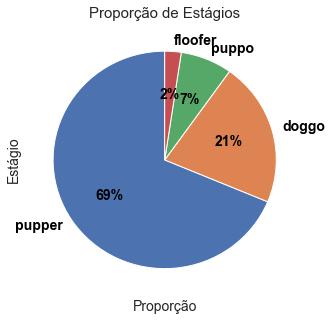

In [51]:
df_clean['stage'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=90, fontsize=14, figsize=(5,5),
                                      textprops=dict(color='black', weight='bold'))
plt.title('Proporção de Estágios', fontsize=15)
plt.xlabel('Proporção',fontsize=14)
plt.ylabel('Estágio',fontsize=14)

Podemos ver no gráfico acima que a maior parte é 'pupper' ocupando mais da metade, mas será que os retweets e favoritos acompanham proporcionalmente?

#### Insight 2 - Quantidade de Retweets e Favoritos por Estágio
Iremos verificar quais estágios tem mais cães e se os retweets e favoritos são compatíveis com suas quantidades em termos de proporções.

In [52]:
# Criando tabelas com os totais para calcular as medias
es_counts = df_clean.pivot_table(index='stage', aggfunc='sum', values=['favorite_count', 'retweet_count'])
es_total = df_clean.pivot_table(index='stage', aggfunc='count', values=['tweet_id'])

es_counts = pd.merge(es_counts, es_total, on=['stage'])
es_counts['favorite_count'] = es_counts['favorite_count'] / es_counts['tweet_id']
es_counts['retweet_count'] = es_counts['retweet_count'] / es_counts['tweet_id']


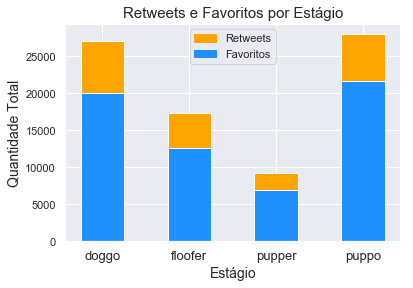

In [53]:
# Cria uma tabela para contar retweets e favoritos por estagio
# es_counts = df_clean.pivot_table(index='stage', aggfunc='sum', values=['favorite_count', 'retweet_count'])
# es_counts

# Cria as barras de sobreviventes divididos por classe 
# 'bottom' é utilizado para alinhar uma coluna sobre a outra
x_pos = np.arange(len(es_counts['favorite_count']))
bar_n = plt.bar(x_pos, es_counts['favorite_count'], 0.5, color='dodgerblue')
bar_s = plt.bar(x_pos, es_counts['retweet_count'], 0.5, color='orange', bottom=es_counts['favorite_count'])

# Definindo título e labels do eixo x
plt.title('Retweets e Favoritos por Estágio', fontsize=15)
plt.xticks(x_pos, ('doggo', 'floofer', 'pupper', 'puppo'), fontsize=13)
plt.xlabel('Estágio',fontsize=14)
plt.ylabel('Quantidade Total',fontsize=14)

# Definindo parâmetros da legenda
retweet_count = mpatches.Patch(color='orange', label='Retweets')
favorite_count = mpatches.Patch(color='dodgerblue', label='Favoritos')
plt.legend(handles=[retweet_count, favorite_count], loc=9)

plt.show()

É interessante observar que apesar da maioria ser do estágio 'pupper' na contagem de retweets e favoritos é o que tem menos em termos proporcionais.

#### Insight 3 - Quantidade de Retweets e Favoritos por Classificação
Será que cães classificados com melhores notas tem mais retweets e favoritos? Iremos levantar dados e criar visualizações para descobrir.

In [54]:
# Conta o numero de caes por classificacao
df_clean['rating'].value_counts()

1.2    449
1.0    418
1.1    396
1.3    261
0.9    150
0.8     95
0.7     51
1.4     35
0.5     33
0.6     32
0.3     19
0.4     15
0.2      9
0.1      4
0.0      2
Name: rating, dtype: int64

* Lembrando que criamos uma coluna calculada chamada 'rating' para facilitar as análises com base nos numeradores e denominadores

Text(0,0.5,'Nº de Cães')

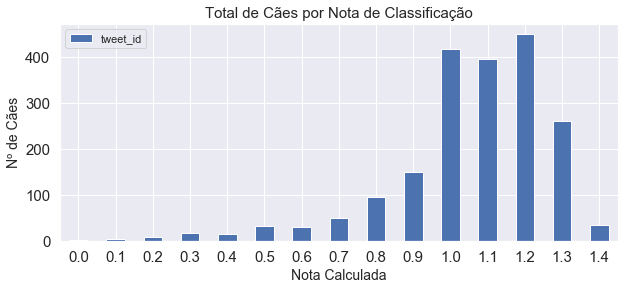

In [55]:
# Cria um gráfico de barras
rt= df_clean.pivot_table(index='rating', aggfunc='count', values='tweet_id')
rt.plot(kind='bar', fontsize=15, figsize=(10,4),  rot=0)

# Ajusta o tamanho da fonte do título para ficar igual dos labels
plt.title('Total de Cães por Nota de Classificação', fontsize=15)
plt.xlabel('Nota Calculada',fontsize=14)
plt.ylabel('Nº de Cães',fontsize=14)

Podemos ver que a grande maioria recebe notas altas de 1.0 a 1.2, mas poucos recebem a nota máxima de 1.4. Por isso temos que calcular a quantidade média de retweets e favoritos por cada tweet.

In [56]:
# Criando tabelas com os totais para calcular as medias
rt_counts = df_clean.pivot_table(index='rating', aggfunc='sum', values=['favorite_count', 'retweet_count'])
rt_total = df_clean.pivot_table(index='rating', aggfunc='count', values=['tweet_id'])

rt_counts = pd.merge(rt_counts, rt_total, on=['rating'])
rt_counts['favorite_count'] = rt_counts['favorite_count'] / rt_counts['tweet_id']
rt_counts['retweet_count'] = rt_counts['retweet_count'] / rt_counts['tweet_id']
rt_counts

,favorite_count,retweet_count,tweet_id
rating,,,
0.0,13284.000000,1774.500000,2
0.1,6791.500000,2964.000000,4
0.2,2141.555556,1261.111111,9
0.3,2279.263158,891.947368,19
0.4,2615.266667,1037.400000,15
0.5,3789.242424,1252.151515,33
0.6,2590.125000,980.218750,32
0.7,2882.372549,1000.607843,51
0.8,2336.410526,847.547368,95


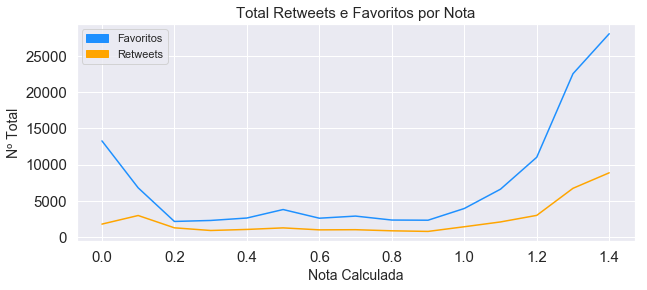

In [57]:
# Cria um gráfico de linhas
rt_counts[['favorite_count', 'retweet_count']].plot(kind='line', fontsize=15, figsize=(10,4), rot=0, 
                                                    color=['dodgerblue', 'orange'])

# Ajusta o tamanho da fonte do título para ficar igual dos labels
plt.title('Total Retweets e Favoritos por Nota', fontsize=15)
plt.xlabel('Nota Calculada',fontsize=14)
plt.ylabel('Nº Total',fontsize=14)

# Definindo parâmetros da legenda
retweet_count = mpatches.Patch(color='orange', label='Retweets')
favorite_count = mpatches.Patch(color='dodgerblue', label='Favoritos')
plt.legend(handles=[favorite_count, retweet_count], loc=0)

plt.show()

Com certeza a nota causa influência no número de retweets e favoritos, podemos observar claramente que as notas mais altas possuem mais retweets e favoritos